In [1]:
import tensorflow as tf
import os
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [2]:
Path=('../Pokemons/train')
Path2=('../Pokemons/val')

In [3]:
classes = os.listdir(Path)
class1 = os.listdir(Path2)

# Image Preprocessing 

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set = train_datagen.flow_from_directory(Path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(Path2,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5391 images belonging to 150 classes.
Found 1429 images belonging to 150 classes.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=256,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.5))

In [10]:
cnn.add(Dense(150, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))


In [11]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 128)        512       
 hNormalization)                                                 
                                                      

In [12]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [13]:
cnn.fit(x=train_set,validation_data=test_set,epochs=25)

Epoch 1/25
169/169 [==============================] - 68s 399ms/step - loss: 6.3889 - accuracy: 0.1078 - val_loss: 6.4118 - val_accuracy: 0.0658
Epoch 2/25
169/169 [==============================] - 53s 312ms/step - loss: 4.3139 - accuracy: 0.2953 - val_loss: 5.6903 - val_accuracy: 0.2974
Epoch 3/25
169/169 [==============================] - 67s 396ms/step - loss: 3.5411 - accuracy: 0.4326 - val_loss: 4.0330 - val_accuracy: 0.4094
Epoch 4/25
169/169 [==============================] - 62s 368ms/step - loss: 3.1135 - accuracy: 0.5186 - val_loss: 3.2011 - val_accuracy: 0.5458
Epoch 5/25
169/169 [==============================] - 62s 370ms/step - loss: 2.8262 - accuracy: 0.5941 - val_loss: 3.2068 - val_accuracy: 0.5395
Epoch 6/25
169/169 [==============================] - 57s 337ms/step - loss: 2.6925 - accuracy: 0.6255 - val_loss: 3.0789 - val_accuracy: 0.5402
Epoch 7/25
169/169 [==============================] - 55s 325ms/step - loss: 2.5351 - accuracy: 0.6566 - val_loss: 2.9066 - val_ac

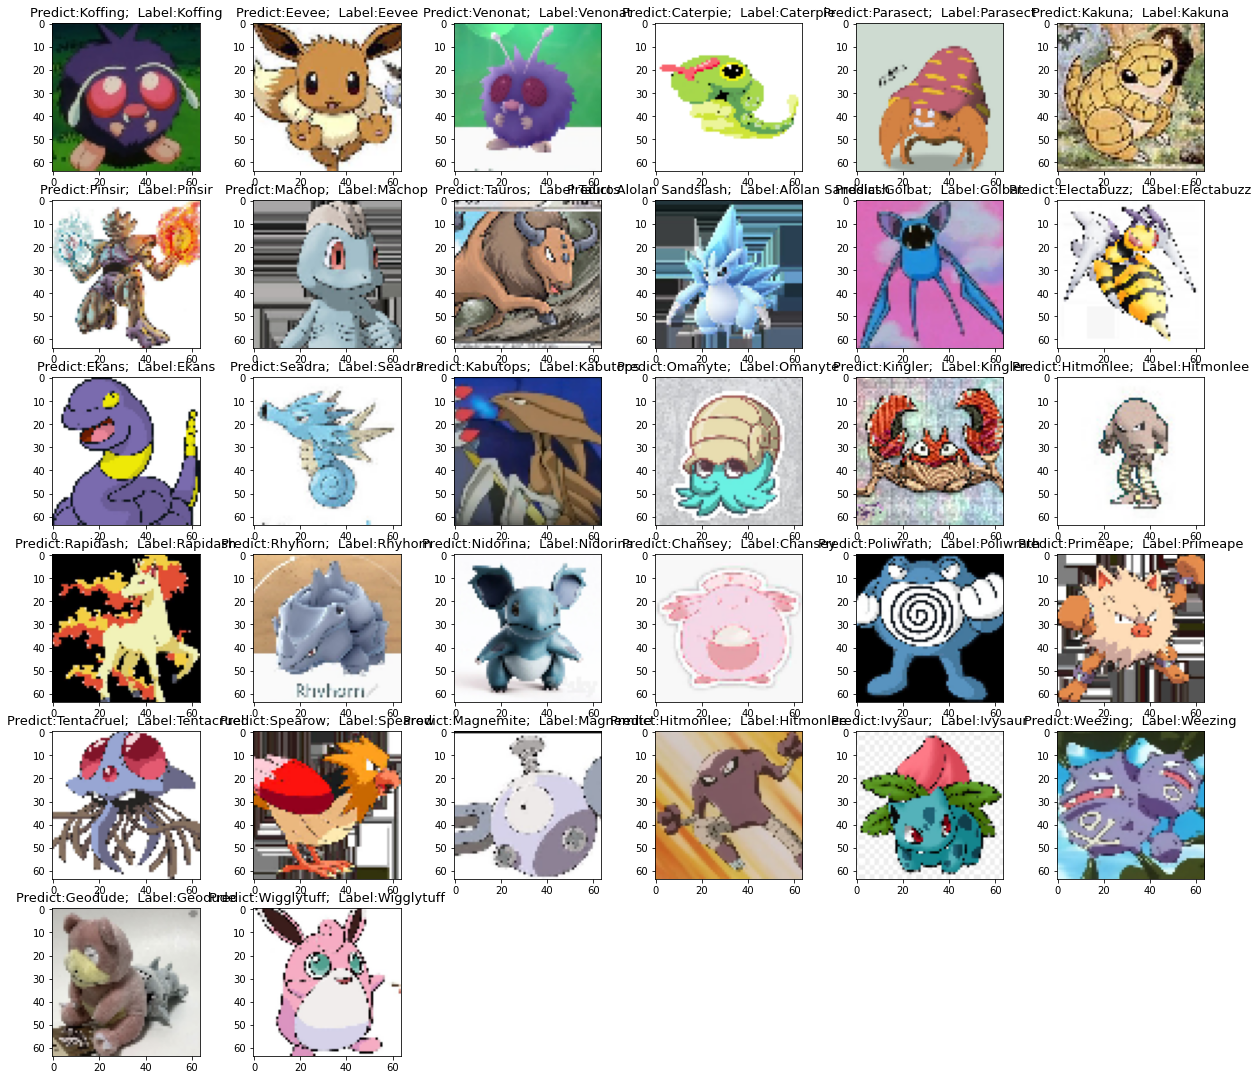

In [25]:
plt.figure(figsize=(21,19))
t_x,t_y = next(test_set) 
pred_ = cnn.predict(t_x)
for i in range(len(t_x)):
    pred,y = pred_[i].argmax(), pred_[i].argmax()
    plt.subplot(6,6,i+1)
    plt.imshow(t_x[i])
    title_ = 'Predict:' + str(classes[pred])+';  Label:' + str(class1[y])
    plt.title(title_,size = 13)
plt.show()